In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys

: 

In [ ]:
print(2)

2


In [ ]:
def random_line_marker(have_line_yon='y', marker_size_bos = 'h'):
    # have_line_yon take values from: ['y', 'n', 'o']; 'o' means doesn't care; 'h' means not care but must have.
    # marker_size_bos: ['b',s','o','h'] for 'big', 'small', 'not care', 'not care but should have'.

    if marker_size_bos=='s':
        mk = ['', 'x','.',',','1','2','3','4','*','+','|','_']
    elif marker_size_bos=='o':
        mk = ['', 'x','.',',','o','v','^','<','>','1','2','3','4','s','p','*','h','H','+','x','D','d','|','_']
    elif marker_size_bos=='h':
        mk = ['x','.',',','o','v','^','<','>','1','2','3','4','s','p','*','h','H','+','x','D','d','|','_']
    elif marker_size_bos=='b':
        mk = ['o','v','^','<','>','s','p','h','H','x','D','d']


    if have_line_yon=='y':
        sty = ['-.','-','--',':']
    elif have_line_yon=='o':
        sty = ['','-.','-','--',':']
    elif have_line_yon=='h':
        sty = ['-.','-','--',':']
    elif have_line_yon=='n':
        sty = ['']

    return np.random.choice(mk)+np.random.choice(sty)

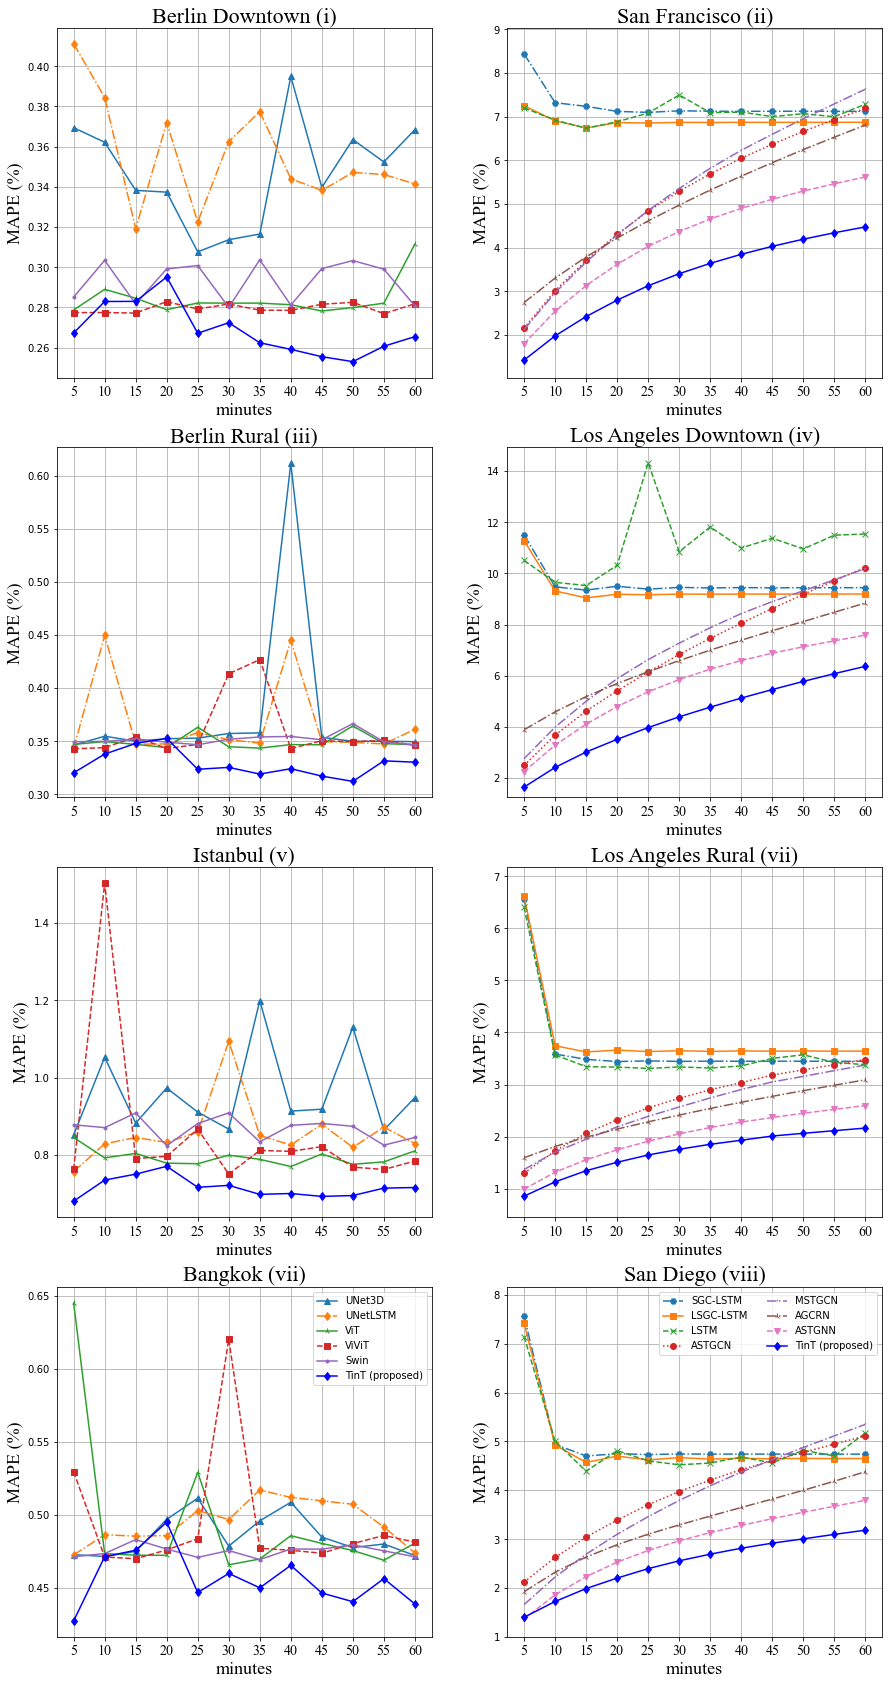

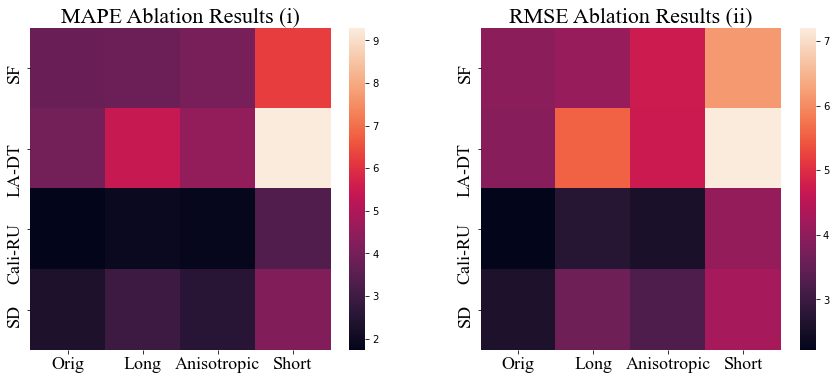

In [ ]:
def plot_grid_modality(ax, mks, city, region, title):
    # city = 'bangkok'
    # cities = ['berlin', 'berlin', 'bangkok']
    # region = 'dt' # ['dt', 'rural', 'dt', 'dt']
    # title = 'Bangkok' # ['Bangkok']
    # model_names = ['UNet3D', 'UNetLSTM', 'ViT', 'ViViT', 'Swin', 'TinT', 'TinT w/ Edge']
    model_names = ['UNet3D', 'UNetLSTM', 'ViT', 'ViViT', 'Swin', 'TinT', 'TinT (proposed)']
    save_dict = np.load(os.path.join('./', f'{city}_{region}.npz'))
    for i, model in enumerate(['unet3d', 'unetlstm', 'vit', 'vivit', 'swin', 'gct', 'gct_e']):
        if i==5: continue
        mape = save_dict[model]
        ax.plot(list(range(1,13)), mape, mks[i], label=model_names[i])

    ax.set_xticks(list(range(1,13)))
    ax.set_xticklabels(['5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55','60'], fontsize=14, fontdict={'family': 'Times New Roman'})
    ax.set_xlabel('minutes', fontsize=18, fontdict={'family': 'Times New Roman'})
    ax.set_ylabel('MAPE (%)', fontsize=18, fontdict={'family': 'Times New Roman'})
    ax.set_title(title, fontsize=22, fontdict={'family': 'Times New Roman'})
    ax.grid(True)




def plot_models_v2():

    def plot_1_subfig(which, ax, mks):
        ttl = ['San Francisco (ii)', 'Los Angeles Downtown (iv)', 'Los Angeles Rural (vii)', 'San Diego (viii)'][which]
        fttl = ['San Francisco', 'Los Angeles Downtown', 'Los Angeles Rural', 'San Diego'][which]
        w2dataf = {0:'sf_dt_result.npz', 1:'la_dt_result.npz', 2:'la_r_result.npz', 3:'sd_result.npz', }
        data = np.load(os.path.join('../ASTGNN_ori', w2dataf[which]))#['result'].squeeze()[:-3]


        gct = np.load(f'../ASTGNN_ori/gct-{fttl}.npy')
        astgnn = data['astgnn'][:-1]
        
        
        lsgc_lstm = data['lsgc_lstm'][:-1]
        sgc_lstm = data['sgc_lstm'][:-1]
        astgcn = data['astgcn'][:-1]
        mstgcn = data['mstgcn'][:-1]
        agcrn = data['agcrn'][:-1]
        lstm = data['lstm'][:-1]

        ax.plot(list(range(1,13)), sgc_lstm, mks[0], label='SGC-LSTM')
        ax.plot(list(range(1,13)), lsgc_lstm, mks[1], label='LSGC-LSTM')
        ax.plot(list(range(1,13)), lstm, mks[2], label='LSTM')
        ax.plot(list(range(1,13)), astgcn, mks[3], label='ASTGCN')
        ax.plot(list(range(1,13)), mstgcn, mks[4], label='MSTGCN')
        ax.plot(list(range(1,13)), agcrn, mks[5], label='AGCRN')
        ax.plot(list(range(1,13)), astgnn, mks[6], label='ASTGNN')
        ax.plot(list(range(1,13)), gct, mks[7], label='TinT (proposed)')
        ax.set_ylim([min(gct)-0.4,max(*lstm, *sgc_lstm)+0.6])

        # ax.set_xticks(list(range(1,13)), ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55','60'])
        ax.set_xticks(list(range(1,13)))
        ax.set_xticklabels(['5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55','60'], fontsize=14, fontdict={'family': 'Times New Roman'})
        # ax.set_yticklabels( fontsize=14, fontdict={'family': 'Times New Roman'})
        ax.set_xlabel('minutes', fontsize=18, fontdict={'family': 'Times New Roman'})
        ax.set_ylabel('MAPE (%)', fontsize=18, fontdict={'family': 'Times New Roman'})
        ax.grid(True)
        ax.set_title(ttl, fontsize=22, fontdict={'family': 'Times New Roman'})




    mks = [random_line_marker() for i in range(10)]
    mks[7] = 'b-d'  # our model should use big mark
    mks_grid = [random_line_marker() for i in range(7)]
    mks_grid[-1] = 'b-d'
    mks_grid[-2] = 'r-d'






    l = 7.4
    fig, axes = plt.subplots(4, 2, figsize=(l*2,l*4))
    # fig, axes = plt.subplots(5, 2, figsize=(l*2,l*4))

    cities = ['berlin', 'berlin', 'istanbul', 'bangkok']
    regions = ['dt', 'rural', 'dt', 'dt']
    titles = ['Berlin Downtown (i)', 'Berlin Rural (iii)', 'Istanbul (v)', 'Bangkok (vii)']
    for i, (c, r, t) in enumerate(zip(cities, regions, titles)):
        plot_grid_modality(axes[i, 0], mks_grid, c, r, t)
    axes[3, 0].legend(ncol=1, loc='upper right')

#     row0_handles, row0_labels = [], []
#     for i in range(4):
#         ha, la = axes[0, i].get_legend_handles_labels()
#         row0_handles += ha
#         row0_labels = la

#     # fig.legend(row1_handles, row1_labels, ncol=2, loc='center right')
#     fig.legend(row0_handles, row0_labels, ncol=1, loc='center right', bbox_to_anchor=(0.9,0.805))
#     # plt.legend(ncol=4, loc='upper right', bbox_to_anchor=(0.5,-0.1))
#     # plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.45,0.45))
    
    plot_1_subfig(0, axes[0, 1], mks)
    # plt.subplot(222)
    plot_1_subfig(1, axes[1, 1], mks)
    # plt.subplot(223)
    plot_1_subfig(2, axes[2, 1], mks)
    # plt.subplot(224)
    plot_1_subfig(3, axes[3, 1], mks)
    axes[3, 1].legend(ncol=2, loc='upper right')
    plt.savefig(f'viz__multi_scale.pdf')


#     row1_handles, row1_labels = [], []
#     for i in range(4):
#         ha, la = axes[0, i].get_legend_handles_labels()
#         row1_handles += ha
#         row1_labels = la

    # fig.legend(row1_handles, row1_labels, ncol=2, loc='center right')
    # fig.legend(row1_handles, row1_labels, ncol=2, loc='center right', bbox_to_anchor=(0.9,0.42))
    # plt.legend(ncol=4, loc='upper right', bbox_to_anchor=(0.5,-0.1))
    # plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.45,0.45))
    
    # plt.savefig(f'viz__multi_scale.pdf')













    import seaborn as sns

    # row: orig, long, iso, short
    ablation_MAPE = np.array([
        [3.78, 3.83, 4.05, 6.25], # SF
        [3.96, 5.45, 4.53, 9.29], # la-DT
        [1.74, 1.92, 1.83, 3.32],  # la-RU, 
        [2.32, 2.92, 2.55, 4.20],  # SD
    ])

    # row: orig, long, iso, short
    ablation_RMSE = np.array([
        [3.97, 4.10, 4.72, 6.15], # SF
        [3.92, 5.56, 4.70, 7.20], # la-DT
        [2.22, 2.74, 2.57, 4.07], # la-RU
        [2.59, 3.62, 3.25, 4.28], # SD
    ])

    labels=['SF', 'LA-DT', 'Cali-RU', 'SD']
    ylabel = ['Orig', 'Long', 'Anisotropic', 'Short']

    # ax = sns.heatmap(ablation_MAPE, ax=axes[4, 0])
    fig, axes = plt.subplots(1, 2, figsize=(l*2,l*0.8))
    ax = sns.heatmap(ablation_MAPE, ax=axes[0])


    fontsize2=18
    ax.set_yticklabels(labels, fontdict={'fontsize':fontsize2,'family': 'Times New Roman'})
    ax.set_xticklabels(ylabel, fontdict={'fontsize':fontsize2,'family': 'Times New Roman'})
    ax.set_title('MAPE Ablation Results (i)', fontsize=22, fontdict={'family': 'Times New Roman'})

    # ax = sns.heatmap(ablation_RMSE, ax=axes[4, 1])
    ax = sns.heatmap(ablation_RMSE, ax=axes[1])

    ax.set_yticklabels(labels, fontdict={'fontsize':fontsize2,'family': 'Times New Roman'})
    ax.set_xticklabels(ylabel, fontdict={'fontsize':fontsize2,'family': 'Times New Roman'})
    ax.set_title('RMSE Ablation Results (ii)', fontsize=22, fontdict={'family': 'Times New Roman'})
    plt.savefig(f'viz__multi_scale_ablation.pdf')
    

    return axes
axes = plot_models_v2()




# plt.savefig(f'__wIns__.pdf')
